#### Here I will analyze the real crime data for San Francisco. First I will consider all different kinds of the incidents together and find how the incidents vary by time of day. Moreover, I will switch my view to the incidents in the evening and find which incident is the most common at night. Finally, I will focus on a single incident, robbery, and find which time robbery is most common

In [7]:
import csv
times = []
with open('sanfrancisco_incidents_summer_2014.csv') as seattle:
    Data = csv.reader(seattle,delimiter=',')
    Data = list(Data)
    for i in range(1,len(Data)):
        times.append(Data[i][5])
    

In [42]:
# Save the hour when the incident happens
t = []
import numpy as np
for i in range(len(times)):
    if int(times[i][3:5])<30:
        t.append(int(times[i][0:2]))
        if int(times[i][0:2])==0:
            t.append(24)
    else:
        t.append(int(times[i][0:2])+1)
        if int(int(times[i][0:2])+1)==24:
            t.append(0)
            


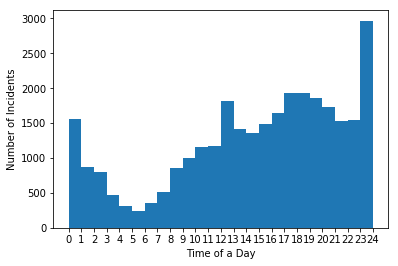

In [43]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(t,bins=24)
plt.xlabel('Time of a Day')
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(0,25,1))
plt.show()

#### Based on the histogram shown above, we can observe the time with highest incident rate is at midnight(11pm-12am) while the lowest is at early morning(5-6am). The incident rate keeps decreasing from the midnight to early morning, and then increasing to the midday. After the midday, we can see the incident rate is increasing as time goes to the early evening, and then decreasing to around 11pm. the incident rate is suddenly boosting at 11pm. 

In [53]:
# Save the number for each incident at night(From 8pm to 5am)
incident_night = {}
for i in range(1,len(Data)):
    if int(Data[i][5][0:2])>=20 or int(Data[i][5][0:2])<5:
        if Data[i][1] in incident_night.keys():
            incident_night[Data[i][1]]+=1
        else:
            incident_night[Data[i][1]]=1
        
            
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

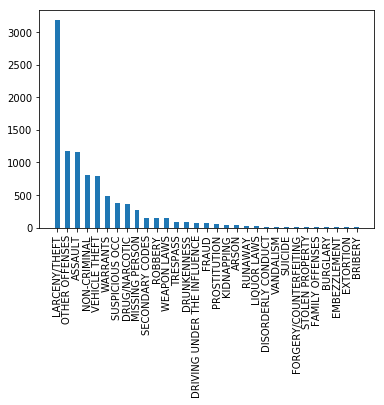

In [65]:
# plot the figure
sorted_value = sorted(incident_night.values(),reverse=True)
sorted_key = sorted(incident_night,key=incident_night.get,reverse=True)
plt.bar(np.arange(len(incident_night)),sorted_value,align='center',width=0.5)
plt.xticks(np.arange(len(incident_night)),sorted_key)
plt.xticks(rotation=90)

#### The three most common incidents at night are Theft, Other offenses and assualt. The three least common are Embezzlement, extortion and bribery

In [78]:
Robbery_Hour=[]
for i in range(1,len(Data)):
    if Data[i][1]=='ROBBERY' and int(Data[i][5][3:5])<30:
        Robbery_Hour.append(int(Data[i][5][0:2]))
    elif  Data[i][1]=='ROBBERY' and int(Data[i][5][3:5])>=30:
        Robbery_Hour.append(int(Data[i][5][0:2])+1)
        

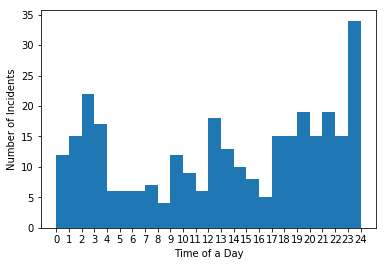

In [79]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(Robbery_Hour,bins=24)
plt.xlabel('Time of a Day')
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(0,25,1))
plt.show()

#### The robbery data show the higheat rate is at midnight(11pm-12am), which is similar with whole incident data. The time that second most common robberies happen is at 2-3am. The lowest robbery rate is at 8-9am. 